### 농구선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제

### 문제정의

### NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수 이름 
- Pos : 포지션 (SG :shooting Guard, C: center)
- 3P : 한 경기당 평균 3점슛 성공횟수
- 2P : 한 경기당 평균 2점슛 성공횟수
- TRB : 한 경기당 평균 리바운드 성공 횟수 
- AST : 한 경기당 평균 어시스트 성공 횟수 
- STL : 한 경기당 평균 스틸 성공 횟수 
- BLK : 한 경기당 평균 블로킹 성공 횟수 

In [3]:
# 포지션 종류 파악 
df.Pos.unique()

array(['SG', 'C'], dtype=object)

In [4]:
# 포지션별 갯수 파악 
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

###  포지션별 내용 
- C : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다.
- SG : 코트 내에서 3점슛 들 장거리에서 슛을 해서 점수를 얻는 역할

### 데이터 시각화 
-데이터 특징을 바탕으로 한 공간에 시각화함으로써 머신러닝에 필요한 컬럼 / 아닌 컬럼을 쉽게 구분

In [5]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### 스틸,2점슛 데이터 시각화 

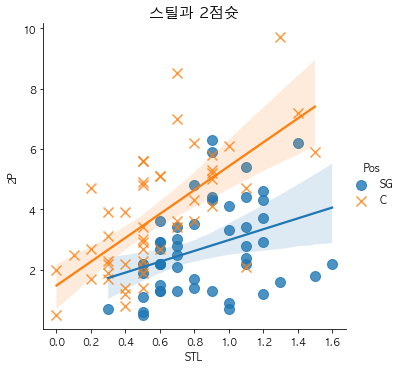

In [8]:
sns.lmplot(
    'STL',
    '2P',
    data = df, 
    # fit_reg = False # 회귀선 그리기 
    markers=['o','x'],
    scatter_kws= {'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos'     # 대상값
)
plt.title('스틸과 2점슛', size=15)
plt.show()

### 어시스트와 2점슛 데이터 시각화

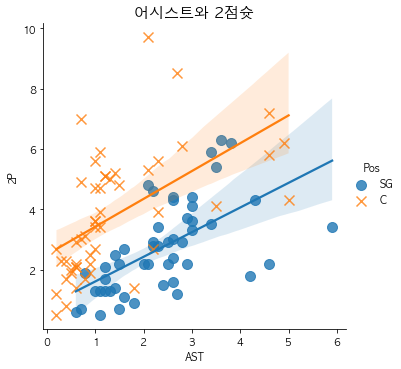

In [9]:
sns.lmplot(
    'AST',
    '2P',
    data = df, 
    # fit_reg = False # 회귀선 그리기 
    markers=['o','x'],
    scatter_kws= {'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos'     # 대상값
)
plt.title('어시스트와 2점슛', size=15)
plt.show()

> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의 경계과 너무 근접해서 분류하기 모호하다.

In [10]:
### 블로킹과 2점슛

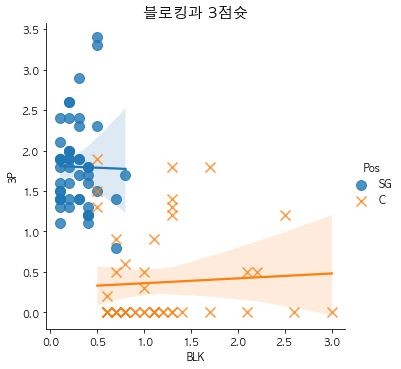

In [11]:
sns.lmplot(
    'BLK',
    '3P',
    data = df, 
    # fit_reg = False # 회귀선 그리기 
    markers=['o','x'],
    scatter_kws= {'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos'     # 대상값
)
plt.title('블로킹과 3점슛', size=15)
plt.show()

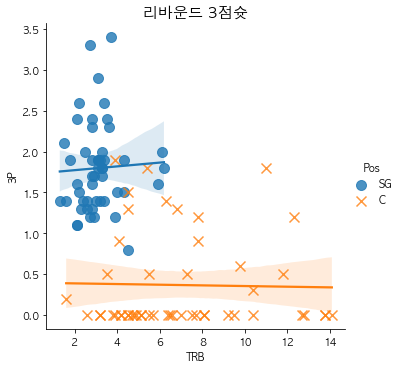

In [12]:
sns.lmplot(
    'TRB',
    '3P',
    data = df, 
    # fit_reg = False # 회귀선 그리기 
    markers=['o','x'],
    scatter_kws= {'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos'     # 대상값
)
plt.title('리바운드 3점슛', size=15)
plt.show()

> 블로킹과 리바운드는 포지션에 따라 센터의 경우 블로킹과 리바운드의 성공횟수가 높아질수록 3점슛의 성공횟수는 낮아진다.
> 슛팅가드일 경우 블로킹과 리바운드의 성공횟수가 낮아질수록 3점슛의 성공횟수는 높아진다.

> 동일한 분류끼리는 서로 근접해 있고, 다른 분류와는 멀리 떨어져 있음<br>
> 시각화한 결과에서 데이터의 구분이 확실한 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다.<br>


## 데이터 다듬기 
: 분별력이 없는 특징(feature)을 데이터에서 제거 
시각화를 통해 확인해본 결과 2P,STL,AST는 분별력이 없다

In [13]:
# 분별력이 없는 특징(feature) 제거 
df.drop(["2P","AST","STL"],axis=1,inplace=True) # 열방향

In [14]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [15]:
# 학습 데이터와 검증 데이터로 나누기
from sklearn.model_selection import train_test_split
# label이 없을경우 
#다듬어진 데이터에서 테스트는 20퍼센트 분류
train, test = train_test_split(
    df, test_size=0.2
)

In [16]:
train.shape

(80, 5)

In [17]:
test.shape

(20, 5)

In [18]:
# 저장하기

#train.to_csv("../Data/basketball_train.csv",index=False)
#test.to_csv("../Data/basketball_test.csv",index=False)